*Feature selection*: 
- A class of dimensionality reduction in which an "important" subset of features from a larger set of features is selected

*Feature extraction*:
- A broader class of dimensionality reduction in which a set of candidate features are transformed to a lower cardinality set of new features using some linear or non-linear mathematical transformations
- Generally domain dependent

### 10.1 Dimensionality Reduction: Feature Selection and Extraction

There are three main reasons why one should reduce dimensionality:
1. Interpretability
    - Helpful to be able to see the relationships between the inputs (feature vector) and the outputs in a given problem
    - Two layers into interpretability of a final constructed model. 
    - One layer is the internal structure of the predictive model. 
    - Another layer is the input to the model per se.
2. Performance
    - *Peaking phenomenon*: the performance of a model initially improves with the addition of more features but eventually deteriorates as more features are included beyond a certain point
3. Computational limitations
    - Given a fixed sample size, a larger data dimensionality would imply a larger number of floating point operations
    - These limitations along with the peaking phenomenon are collectively known as the *curse of dimensionality*

##### Peaking Phenomenon

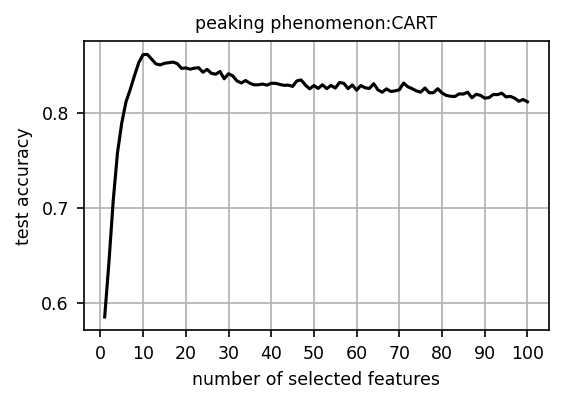

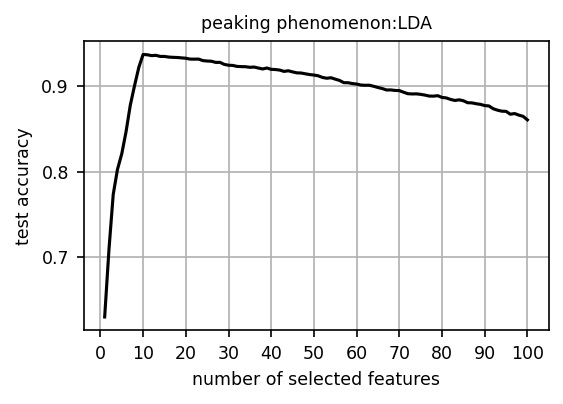

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as CART
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
np.random.seed(42)
n_features = 100
mc_no = 20 # number of Monte Carlo simulation
acc_test = np.zeros((2, n_features)) # to record test accuracies for both LDA and CART
cart = CART()
lda = LDA()
for j in np.arange(mc_no):
  # by setting shuffle=False in make_classification, the informative features are put first
  X, y = make_classification(n_samples=1000, n_features=n_features, n_informative=10, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=1, shuffle=False)
  X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.2)
  acc_test[0] += np.fromiter((cart.fit(X_train_full[:,:i], y_train).score(X_test_full[:,:i],y_test) for i in np.arange(1, n_features+1)), float)
  acc_test[1] += np.fromiter((lda.fit(X_train_full[:,:i], y_train).score(X_test_full[:,:i],y_test) for i in np.arange(1, n_features+1)), float)

for i, j in enumerate(['CART', 'LDA']):
  plt.figure(figsize=(4, 2.5), dpi = 150)
  plt.plot(np.arange(1, n_features+1), acc_test[i]/mc_no, 'k')
  plt.ylabel('test accuracy', fontsize='small')
  plt.xlabel('number of selected features', fontsize='small')
  plt.title('peaking phenomenon:' + j, fontsize='small')
  plt.yticks(fontsize='small')
  plt.xticks(np.arange(0, n_features+1, 10), fontsize='small')
  plt.grid(True)

### 10.2 Feature Selection Techniques

The importance of a feature or a feature subset could be judged either by prior knowledge or could be data-driven

Selecting features using prior knowledge is itself a legitimate feature selection strategy, which naturally depends on the quality of the prior knowledge and is domain dependent

Data-driven methods:
- Filters
- Wrappers
- Embedded

#### 10.2.1 Filter Methods

Select features based on general characteristics of data measured independently of a learning algorithm

The advantages of using filter methods:
- Efficiency (fast execution)
- Generality to various learning algorithms (filter methods select features based on certain characteristics of data rather than based on the interaction between a specific learning algorithm and the data)

##### Statistical Tests

Reference: https://latrobe.libguides.com/maths/hypothesis-testing#:~:text=Hypothesis%20testing%20is%20a%20systematic,a%20hypothesis%20about%20a%20population.

- t-test: binary classification
- ANOVA: multiclass classification

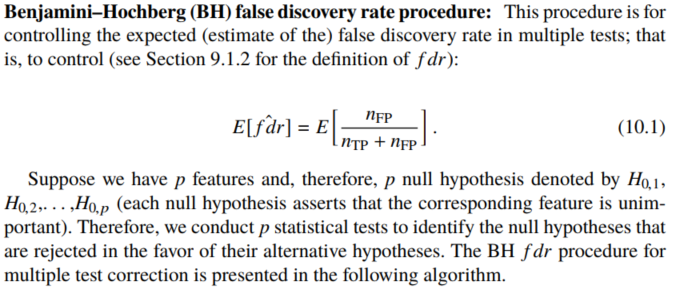  

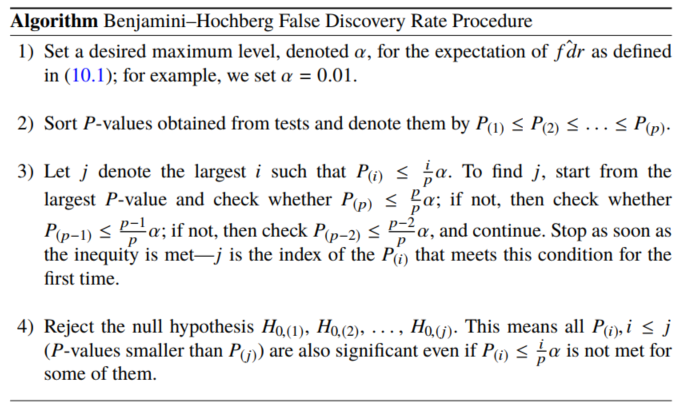

##### Example

#### 10.2.2 Wrapper Methods

Wrap around a specific learning algorithm and evaluate the imoprtance of a feature subset using the predictive performance of the learner trained on the feature subset.

The learning algorithm that is use for wrapper feature selection does not necessarily need to be the same as the learning algorithm that is used to construct the final predictive model.

Commonly used wrapper methods include a search strategy using which the space
of feature subsets is explored. Each time a candidate feature subset is selected for
evaluation based on the search strategy, a model is trained and evaluated using an
evaluation rule along with an evaluation metric. In this regard, cross-validation is
the most popular evaluation rules and either the accuracy, the ROC AUC, or the F1
score would be common metrics to use. At the end of the search process, the feature
subset with highest score is returned as the chosen feature subset. Although there are
many search strategies to use in this regard, here we discuss three approaches that
are straightforward to implement:
- Exhaustive Search
- Sequential Forward Search (SFS)
- Sequential Backward Search (SBS)

##### Exhaustive Search

Although it is the optimal search strategy, the exponential complexity of the search space is the main impediment in its implementation

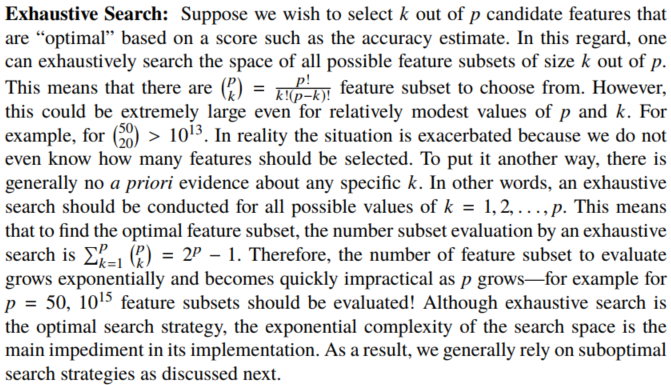

##### Sequential Forward Search (SFS)

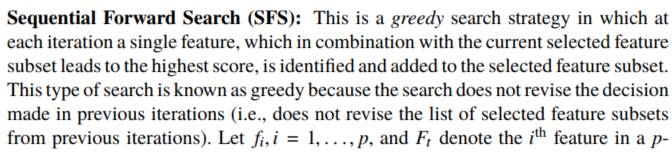

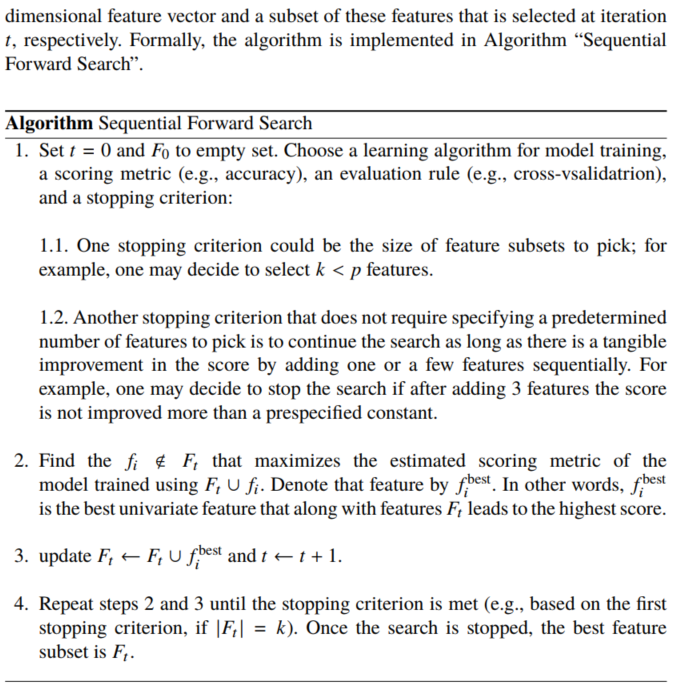

##### Sequential Backward Search (SBS)

- Computational complexity higher than SFS

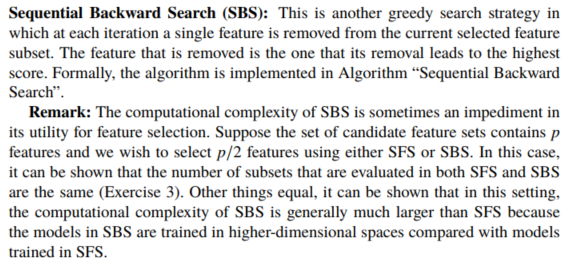

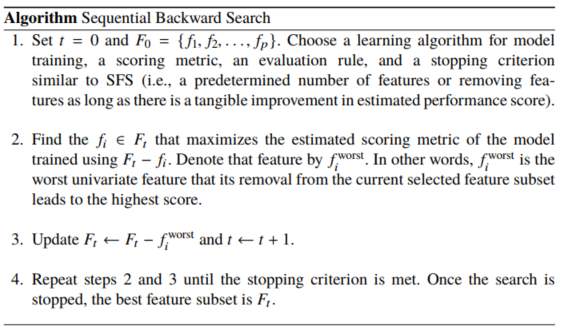

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

n_features = 100
n_informative = 10
lda = LDA()

X, y = make_classification(n_samples=1000, n_features=n_features, n_informative=10, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=1, shuffle=False)
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.2)
strkfold = StratifiedKFold(n_splits=5, shuffle=True)

In [4]:
%%timeit -n 1 -r 1
np.random.seed(42)
sfs = SequentialFeatureSelector(lda, n_features_to_select=10, cv=strkfold, n_jobs=-1) # by default the direction is 'forwards'
sfs.fit(X_train_full, y_train)
print(sfs.get_support()) # using support we can see which feature is selected (True means selected, False means not selected)
print("The number of truly informative features chosen by SFS is:", sum(sfs.get_support()[:10]))

[False  True False  True False False False  True  True False False False
 False  True False False False False False False False False False False
 False  True False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False  True False False  True False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
The number of truly informative features chosen by SFS is: 4
22 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [6]:
%%timeit -n 1 -r 1
sbs = SequentialFeatureSelector(lda, n_features_to_select=10, cv=strkfold, direction='backward', n_jobs=-1)
sbs.fit(X_train_full, y_train)
print(sbs.get_support())
print("The number of truly informative features chosen by SBS is:", sum(sbs.get_support()[:10]))

[ True  True  True False False False False  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False]
The number of truly informative features chosen by SBS is: 6
1min 58s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### 10.2.3 Embedded Methods

Onece the predictive model is constructed, the structure of the model can be used for feature selection. In other words, the feature selection stage is embedded into the model training

Two types of embedded methods:
1. Non-iterative 
2. Iterative

##### Non-iterative Embedded Methods

1. $l_1$ regularization (lasso)
    - Selecting features in a high-dimensional setting as it sets the coefficents of many features to zero
2. Mean Decrease Impurity (MDI)
    - A common metric to measure importance in random forests
    - The MDI for a feature $k$ denoted $\text{MDI}_{f_k}$: normalized sum of impurity drops across all nodes and all trees that use $f_k$ for splitting the nodes

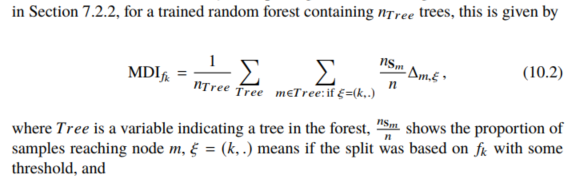

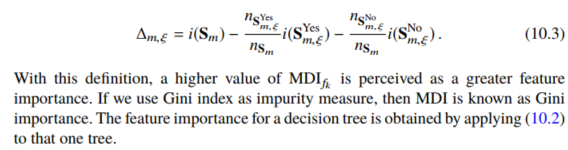

##### Iterative Embedded Methods

Guides the search by some criteria related to the learning algorithm or the structure of the trained predictive model

**Recursive Feature Elimination (RFE)**
- A feature ranking criterion related to the structure of the trained predictive model is used to recursively remove lowest-ranked features
- Significant computational efficiency with respect to SBS

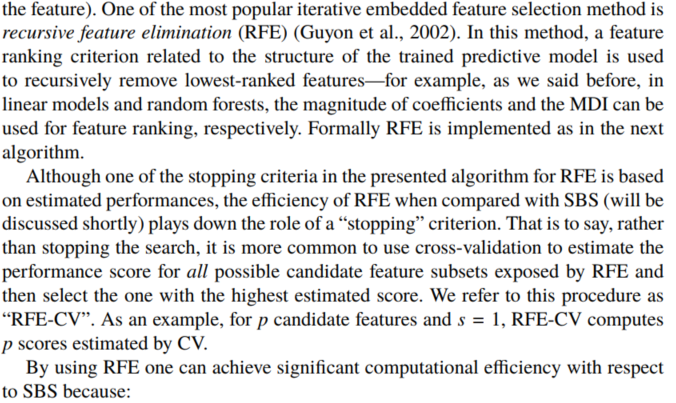

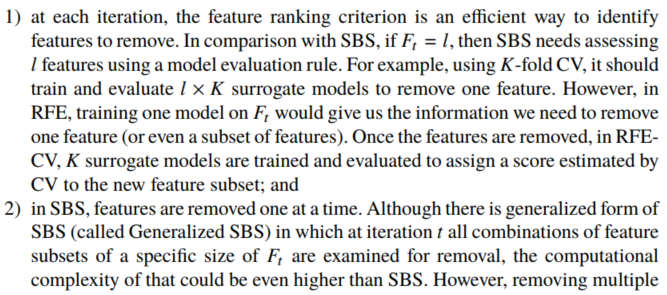

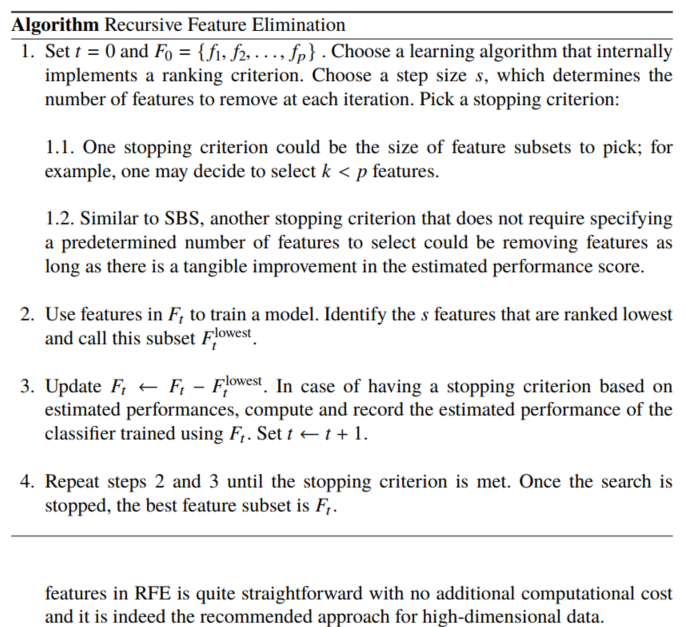

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

np.random.seed(42)
n_features = 100
n_informative = 10
lda = LDA()

X, y = make_classification(n_samples=1000, n_features=n_features, n_informative=10, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=1, shuffle=False)
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.2)
strkfold = StratifiedKFold(n_splits=5, shuffle=True)

In [8]:
import time
start = time.time()
rfe = RFE(lda, n_features_to_select=10)
rfe.fit(X_train_full, y_train)
print(rfe.get_support())
print("The number of truly informative features chosen by RFE is:", sum(rfe.get_support()[:10]))
end = time.time()
print("The RFE execution time (in seconds): {:.4f}".format(end - start))
lda_score = rfe.score(X_test_full, y_test)
print("The score of the lda trained using selected features on training data is: {:.4f}".format(lda_score))

[ True  True  True False  True False  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False]
The number of truly informative features chosen by RFE is: 8
The RFE execution time (in seconds): 0.8467
The score of the lda trained using selected features on training data is: 0.9500
